In [1]:
import pandas as pd
import numpy as np
import datetime 
import math
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
%cd ..

c:\Users\Frank\OneDrive\Documents\git\delta_test_bnc


In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
from bnc_tms import tms

In [5]:
#Dummy dates
ndays = int(60 * 7/5)
base = datetime.date.today()
dates = [base - datetime.timedelta(days = n) for n in range(ndays)]
dates = np.array([x for x in dates if x.weekday() not in [5,6]])

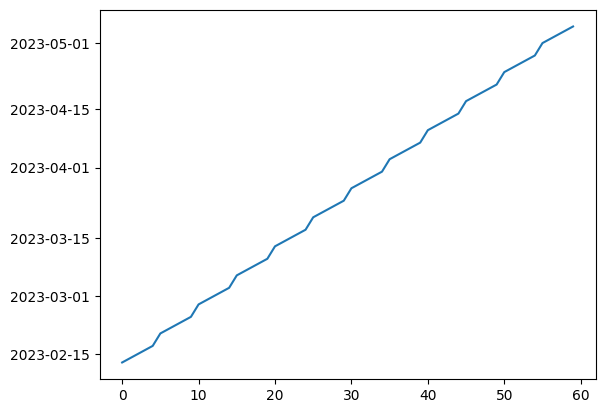

In [6]:
plt.plot(np.flip(dates))

In [7]:
#Dummy volume
vol = 10000
nrows = vol + np.array([int(vol * (2 + math.sin(i * 2*math.pi/5))) for i in range(ndays)])

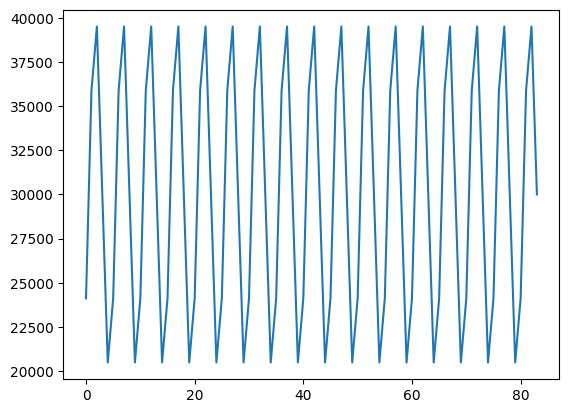

In [8]:
plt.plot(np.flip(nrows))

In [9]:
#Frame
rows = [[dt, v] for dt,v in zip(dates, nrows)]
df = pd.DataFrame(rows, columns = ["Date", "Rows"])

In [10]:
tms_model = tms.timeseries_model(df)

------ DELTA TIMESERIES TEST RESULT ------
Model r-squared: 1.0
Correlation between residuals and fitted values: nan
Baseline: 25000
Daily trend: 0.0
Y lagged term: 0.0
Lag (days): 7.0
*****
Residuals distribution: {'type': 'Percentage error, estimated with CV = 5', 'mean': -0.0, 'sdev': 0.0}
Observed volume: 30000
Expected volume: 29999
Percentage change: 0.0 %
p-value: 0.0
Test alpha: 0.05
Result: FAIL
------------------------------------------


c:\Users\Frank\OneDrive\Documents\git\delta_test_bnc\venv\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


<Axes: ylabel='Density'>

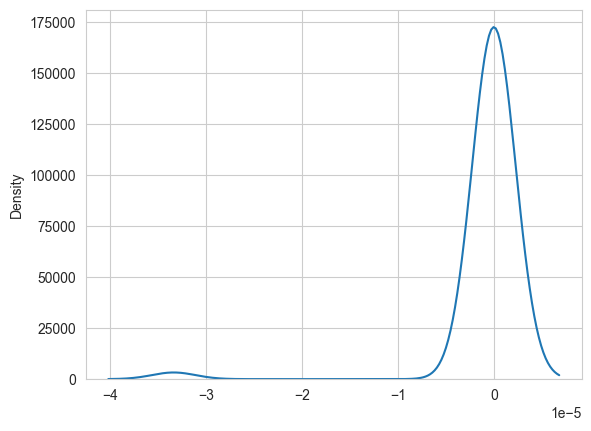

In [11]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(tms_model["residuals"]), bw_method = 0.5)

In [12]:
#Dummy volume
vol = 10000
nrows = np.array([int(vol * (2 + math.sin(i * 2*math.pi/5))) for i in range(ndays)])

sdev = int(vol/5)
nrows = nrows + np.array([int(np.random.normal(0, sdev)) for n in range(ndays)])
nrows = vol + nrows - min(nrows)

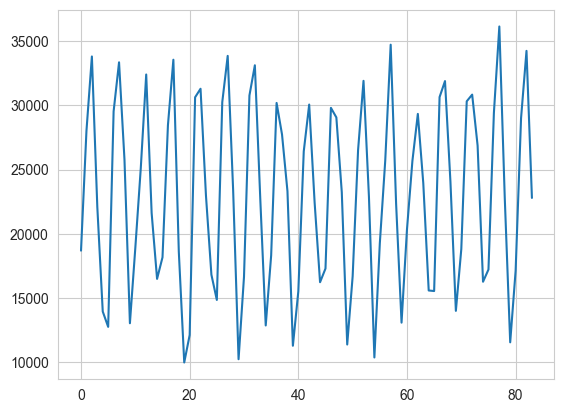

In [13]:
plt.plot(np.flip(nrows))

In [14]:
#Frame
rows = [[dt, v] for dt,v in zip(dates, nrows)]
df = pd.DataFrame(rows, columns = ["Date", "Rows"])

In [15]:
tms_model = tms.timeseries_model(df, alpha=0.025)

------ DELTA TIMESERIES TEST RESULT ------
Model r-squared: 0.9493
Correlation between residuals and fitted values: -0.0313
Baseline: 21506
Daily trend: 0.0208
Y lagged term: -0.1976
Lag (days): 7.0
*****
Residuals distribution: {'type': 'Percentage error, estimated with CV = 5', 'mean': 0.0034, 'sdev': 0.1122}
Observed volume: 22800
Expected volume: 24667
Percentage change: -8.19 %
p-value: 0.3861
Test alpha: 0.025
Result: PASS
------------------------------------------


<Axes: ylabel='Density'>

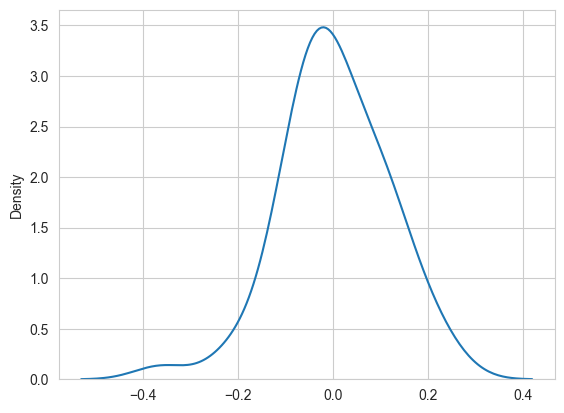

In [16]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(tms_model["residuals"]), bw_method = 0.5)

In [17]:
#Dummy volume
vol = 10000
sdev = int(vol/300)
nrows = vol + np.array([int(np.random.normal(0, sdev)) for n in range(ndays)])

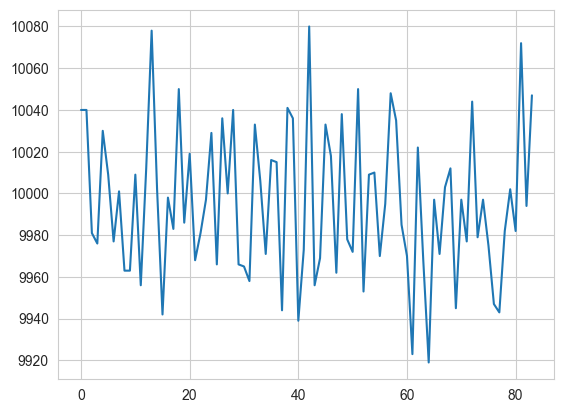

In [18]:
plt.plot(np.flip(nrows))

In [19]:
#Frame
rows = [[dt, v] for dt,v in zip(dates, nrows)]
df = pd.DataFrame(rows, columns = ["Date", "Rows"])

In [20]:
tms_model = tms.timeseries_model(df)

------ DELTA TIMESERIES TEST RESULT ------
Model r-squared: 0.1117
Correlation between residuals and fitted values: 0.0033
Baseline: 6140
Daily trend: -0.0001
Y lagged term: 0.2632
Lag (days): 13.0
*****
Residuals distribution: {'type': 'Percentage error, estimated with CV = 5', 'mean': 0.0001, 'sdev': 0.004}
Observed volume: 10047
Expected volume: 9993
Percentage change: 0.54 %
p-value: 0.1543
Test alpha: 0.05
Result: PASS
------------------------------------------


<Axes: ylabel='Density'>

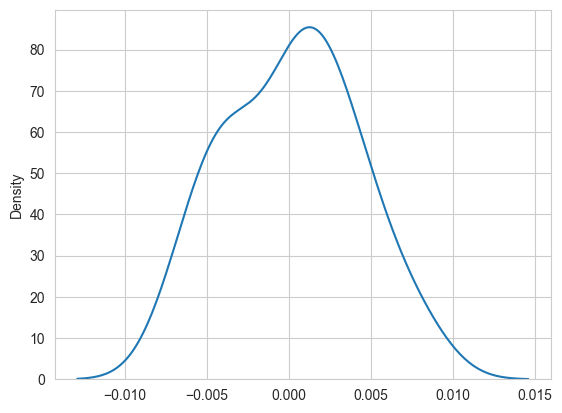

In [21]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(tms_model["residuals"]), bw_method = 0.5)

In [22]:
#Dummy volume
vol = 10000
sdev = int(vol/20)
nrows = vol + np.array([int(np.random.normal(0, sdev)) for n in range(ndays)])
nrows = nrows - 100 * np.array([i for i in range(len(nrows))])

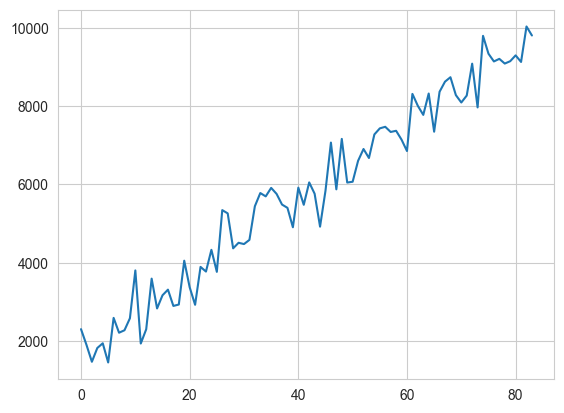

In [23]:
plt.plot(np.flip(nrows))

In [24]:
#Frame
rows = [[dt, v] for dt,v in zip(dates, nrows)]
df = pd.DataFrame(rows, columns = ["Date", "Rows"])

In [25]:
tms_model = tms.timeseries_model(df)

------ DELTA TIMESERIES TEST RESULT ------
Model r-squared: 0.9406
Correlation between residuals and fitted values: -0.0287
Baseline: 2790
Daily trend: 0.0352
Y lagged term: 0.2212
Lag (days): 1.0
*****
Residuals distribution: {'type': 'Percentage error, estimated with CV = 5', 'mean': 0.0163, 'sdev': 0.0832}
Observed volume: 9805
Expected volume: 9679
Percentage change: 1.29 %
p-value: 0.9285
Test alpha: 0.05
Result: PASS
------------------------------------------


<Axes: ylabel='Density'>

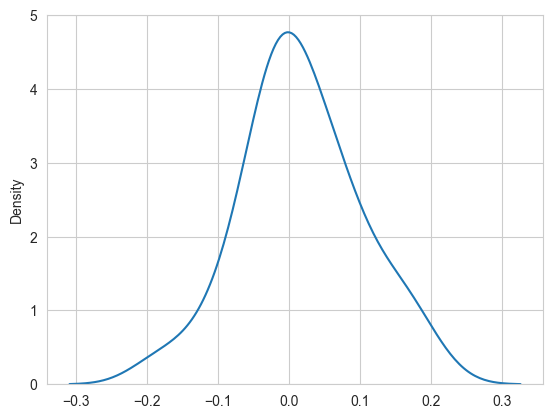

In [26]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(tms_model["residuals"]), bw_method = 0.5)

In [27]:
vol = 10000
sdev = int(vol/400)
nrows = vol + np.array([int(np.random.normal(0, sdev)) for n in range(ndays)])
from random import sample

index = sample([i for i in range(0,ndays)], int(ndays/5))
nrows[index] = nrows[index] + 3*vol

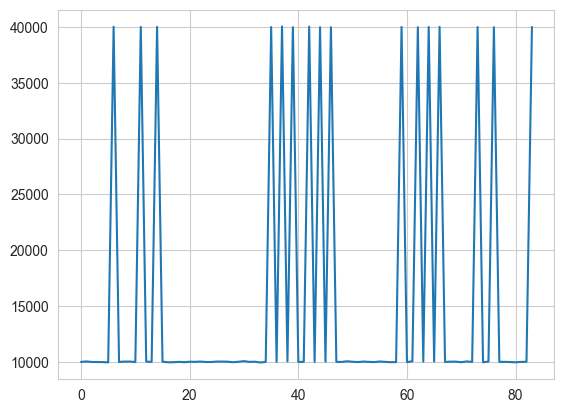

In [28]:
plt.plot(np.flip(nrows))

In [29]:
tms_model = tms.timeseries_model(df)

------ DELTA TIMESERIES TEST RESULT ------
Model r-squared: 0.9406
Correlation between residuals and fitted values: -0.0287
Baseline: 2790
Daily trend: 0.0352
Y lagged term: 0.2212
Lag (days): 1.0
*****
Residuals distribution: {'type': 'Percentage error, estimated with CV = 5', 'mean': 0.0163, 'sdev': 0.0832}
Observed volume: 9805
Expected volume: 9679
Percentage change: 1.29 %
p-value: 0.9285
Test alpha: 0.05
Result: PASS
------------------------------------------


<Axes: ylabel='Density'>

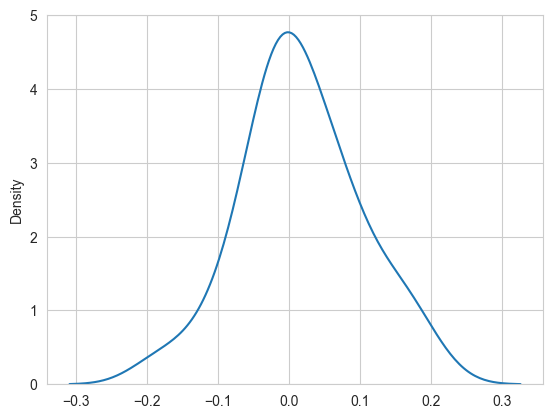

In [30]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(tms_model["residuals"]), bw_method = 0.5)

In [31]:
tms_model["coefs"]

{'baseline': 2790.1491,
 'Monday': 312.0437,
 'Tuesday': 354.6445,
 'Wednesday': 784.0748,
 'Thursday': 779.4745,
 'Friday': 559.9116,
 'daily_trend': 0.0352,
 'volume_lagged': 0.2212}